# Project Carbon Stars

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

# 1. Introduction

Stars are responsible for the production of all elements heavier than Helium. They can have different masses and chemical composition. Precise measurements of the chemical composition of stars provides us with information regarding the chemical evolution of our Galaxy. To get an estimation of the abundance of a particular element, e.g. Iron, it is necessary that the star is observed in High-resolution.  

In order to get observations in High-resolution, a large telescope is required. The Figure below shows four 8.2 m telescopes located in Chile and known as VLT (Very Large Telescopes). These telescopes are expensive and it is not easy to get time to observe on them.  

![title](VLT2.jpg)

## 1.1 What do we want to observe?

When passing the light of a star through a prism, it is decomposed into different wavelenghts as shown in the illustration bellow. This decomposition is called a Spectrum. 

![title](solar_spec.jpg)

A real observation is more complex than what is shown above and the amount of detail that can be visualized depends on the resolution of the observation. The Figure below shows the difference between a high-resolution spectrum, where two points in the plot are separated by 0.02 Angstrons and a low-resolution one where this separation is equal to 1 Angstrom.

![title](Hres_Lres.jpeg)

## 1.2 How to get time on a telescope?

![title](proposal.png)

## 1.3 How do we Select Targets?

Targets cannot be selected randomly, instead, they need to fit our scientific objectives. 

### 1.3.1 SDSS

The Sloan Digital Sky Survey (SDSS) is a survey of the sky containing hundreds of thousands of stars that were observed in low-resolution. This means that the observations provided by this survey cannot be used to measure chemical abundances, but could be used to select interesting targets. However, most of the data from this survey is unlabelled. 

### 1.3.2 What is the Solution?

Because we know the physics of how a star produces its spectrum , we can use a code to produce spectra of different compositions. 

We will use, then, synthetic spectra. 

## 1.4 Synthetic Spectra

We used a radiative-transfer code to create ~20,000 synthetic spectra with a resolution similar to the resolution of the SDSS observations. The spectra produced mimic the composition of stars that have a normal amount of carbon and the stars we are interested in which present an excess of carbon. We, then, added gaussian white noise to the spectra.

# 2. The Data


The data is comprised by 9 features for ~20,000 synthetic stars. 

## 2.1 What are the Features?

The features are basically the area inside absorption lines (orange area in the Figure below) for key elements related to Carbon-enhanced Metal-Poor Stars. 

![title](ex_ew.jpg)

## 2.2 What is the problem we want to solve?

We produced stars with compositions typical of 3 types of stars:


| Class         |  Types                        | Proportion  |
| ------------- |:-----------------------------:| -----------:|
| 1             | C-normal                      | ~ 80%       |
| 2             | C-rich/ no heavy elements     | ~  7%       |
| 3             | C-rich/ heavy elements        | ~ 13%       |


We have, then, a **Classification Problem!!!!**

In [2]:
import pandas as pd
from pandas import Series,DataFrame
from pylab import *
import numpy as np
from numpy import nan as NA
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import math
import ipywidgets as widgets
import itertools
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler 
import itertools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import random
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from pylab import *
from sklearn.cluster import KMeans


from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

In [3]:
# Getting the data into a dataframe
columns = ['ID','Temp','[Fe/H]','log(g)',' KP','Fe5270','GP', 'GPE', 'Bamg','Ba_bmc','Eu_bmc','Sr_bmc','g-r','classe']

df = pd.read_csv('Hugo_SN40_ML.csv',usecols=columns)
df.head(10)

ID  Temp  [Fe/H]  log(g)      KP  Fe5270     GP     GPE    g-r   Bamg  \
0  M0000   4200    -1.0     1.4   9.188   3.519  7.041  42.792  1.119 -0.264   
1  M0001   4200    -1.0     1.4  10.198   2.918  6.989  35.250  1.100 -0.233   
2  M0002   4200    -1.0     1.4   8.570   3.678  7.221  39.710  1.116 -0.294   
3  M0003   4200    -1.0     1.4   8.677   2.908  6.912  39.763  1.117 -0.213   
4  M0004   4200    -1.0     1.4   8.739   3.433  7.113  33.972  1.108 -0.226   
5  M0005   4200    -1.0     1.4   7.169   2.905  7.479  29.445  1.113 -0.230   
6  M0006   4200    -1.0     1.4   7.601   2.704  7.043  35.130  1.109 -0.267   
7  M0007   4200    -1.0     1.4   7.921   2.484  7.427  31.978  1.118 -0.255   
8  M0009   4200    -1.0     1.4   8.799   3.079  7.119  40.067  1.126 -0.221   
9  M0010   4200    -1.0     1.4   9.910   2.973  6.958  36.310  1.118 -0.237   

   Ba_bmc  Eu_bmc  Sr_bmc  classe  
0   0.587   0.661   2.368       1  
1   0.766   0.673   2.794       1  
2   0.772   0.715   2.583       1  
3   0.681   0.667   1.856       1  
4   0.759   0.780   2.356       1  
5   0.651   0.765   1.993       1  
6   0.521   0.772   1.986       1  
7   0.580   0.702   1.846       1  
8   0.549   0.772   2.681       1  
9   0.862   0.899   2.990       1

In [4]:
df.describe()

Temp        [Fe/H]        log(g)            KP        Fe5270  \
count  18386.000000  18386.000000  18386.000000  18386.000000  18386.000000   
mean    5397.759437     -1.664582      3.340797      4.860402      1.220740   
std      536.267658      0.518595      1.094828      2.366159      0.665053   
min     4200.000000     -3.000000      1.000000     -5.511000      0.001000   
25%     5040.000000     -2.000000      2.500000      3.090250      0.718000   
50%     5400.000000     -1.500000      3.500000      5.303000      1.200500   
75%     5900.000000     -1.500000      4.400000      6.630000      1.618000   
max     6775.000000     -1.000000      4.800000     11.984000      3.911000   

                 GP           GPE           g-r          Bamg        Ba_bmc  \
count  18386.000000  18386.000000  18386.000000  18386.000000  18386.000000   
mean       3.429997     20.032729      0.547165     -0.277688      0.961674   
std        1.996668     15.107907      0.227998      0.029323      0.458882   
min       -0.205000      0.006000      0.151000     -0.406000      0.018000   
25%        1.696250      8.471500      0.363000     -0.295000      0.668000   
50%        3.168000     15.322500      0.509000     -0.281000      0.854000   
75%        5.234000     28.809500      0.653000     -0.265000      1.127000   
max        8.836000     95.646000      1.529000      0.160000      4.909000   

             Eu_bmc        Sr_bmc        classe  
count  18386.000000  18386.000000  18386.000000  
mean       0.661433      2.157795      1.365224  
std        0.290177      0.747546      0.805695  
min        0.004000      0.183000      1.000000  
25%        0.491000      1.626000      1.000000  
50%        0.633000      2.073000      1.000000  
75%        0.788000      2.582000      1.000000  
max        3.937000      4.998000      4.000000

The column **Temp** represents the temperature at the surface of the star, **log(g)** represents the pressure at the surface of the star, and **[Fe/H]** represents the amount of Iron compared to the Sun. These three columns are the inputs for the code to produce the spectra and are information we have for the objects in the SDSS database.

In [5]:
# Because we are interested in separate between carbon stars with and without heavy elements,
# we will combine classes 3 and 4 that represent carbon stars with excess of different types of heavy elements
# Combine classes 3 and 4:
df.classe[(df.classe == 4)]=3

/home/monique/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
# Count the number of types of stars
pd.value_counts(df['classe'],dropna=True,sort=False,normalize=True)

1    0.801643
2    0.073262
3    0.125095
Name: classe, dtype: float64

In [7]:
df.columns

Index(['ID', 'Temp', '[Fe/H]', 'log(g)', ' KP', 'Fe5270', 'GP', 'GPE', 'g-r',
       'Bamg', 'Ba_bmc', 'Eu_bmc', 'Sr_bmc', 'classe'],
      dtype='object')

## 2.3 Splitting the Data

The variable **[Fe/H]**, as explained above, is one the inputs for the code that creates the spectrum. 
We used 5 values for this variable and created stars with the proportions of **[Fe/H]** found in the literature. Because the proportions are quite different, see Figure below, we believe a stratified split using this variable will reduce the error in the predictions.

Text(0.5,0,'[Fe/H]')

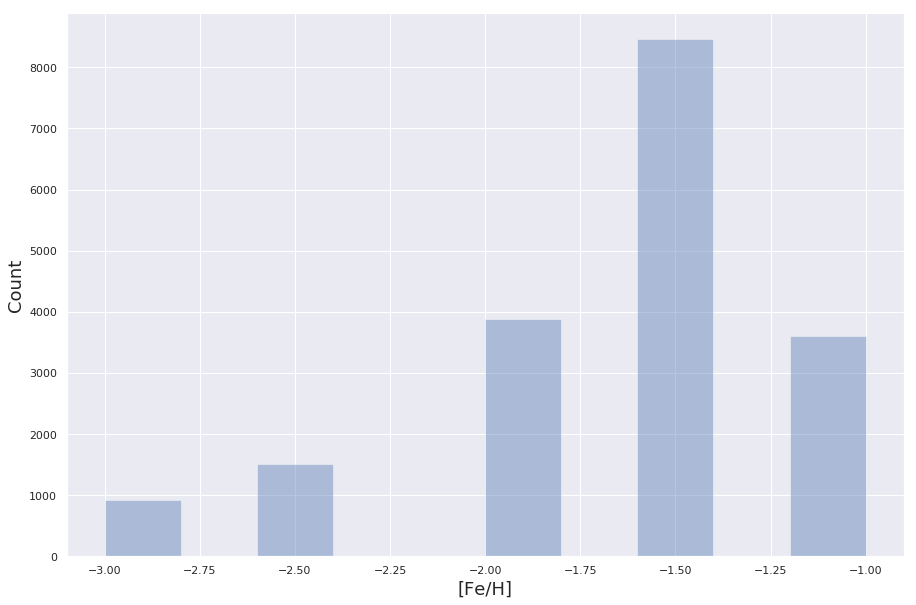

In [10]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df['[Fe/H]'],bins=10, kde=False)
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('[Fe/H]',fontsize=18)

In [11]:
# We will use a stratified split to ensure that both the test and train sets are
# representative of the income categories.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df["[Fe/H]"]):
    strat_train_set = df.loc[train_index]
    strat_test_set  = df.loc[test_index]

In [12]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [13]:
# Calculates the proportion of each income class in the original data set and in the test sets
# created by a random and a stratified splitting.
def income_cat_proportions(data):
    return data["[Fe/H]"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [14]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
-3.0  0.049821    0.049855  0.051668      3.708030       0.069152
-2.5  0.082073    0.082125  0.076686     -6.564024       0.062641
-2.0  0.211465    0.211385  0.217186      2.705467      -0.037918
-1.5  0.460731    0.460660  0.461385      0.141964      -0.015430
-1.0  0.195910    0.195975  0.193075     -1.447216       0.033389

# 3. Exploratory Analysis

We will start the analysis trying to identify whether the star is normal or carbon stars. At this moment, we will ignore the subclasses of carbon enhanced stars.

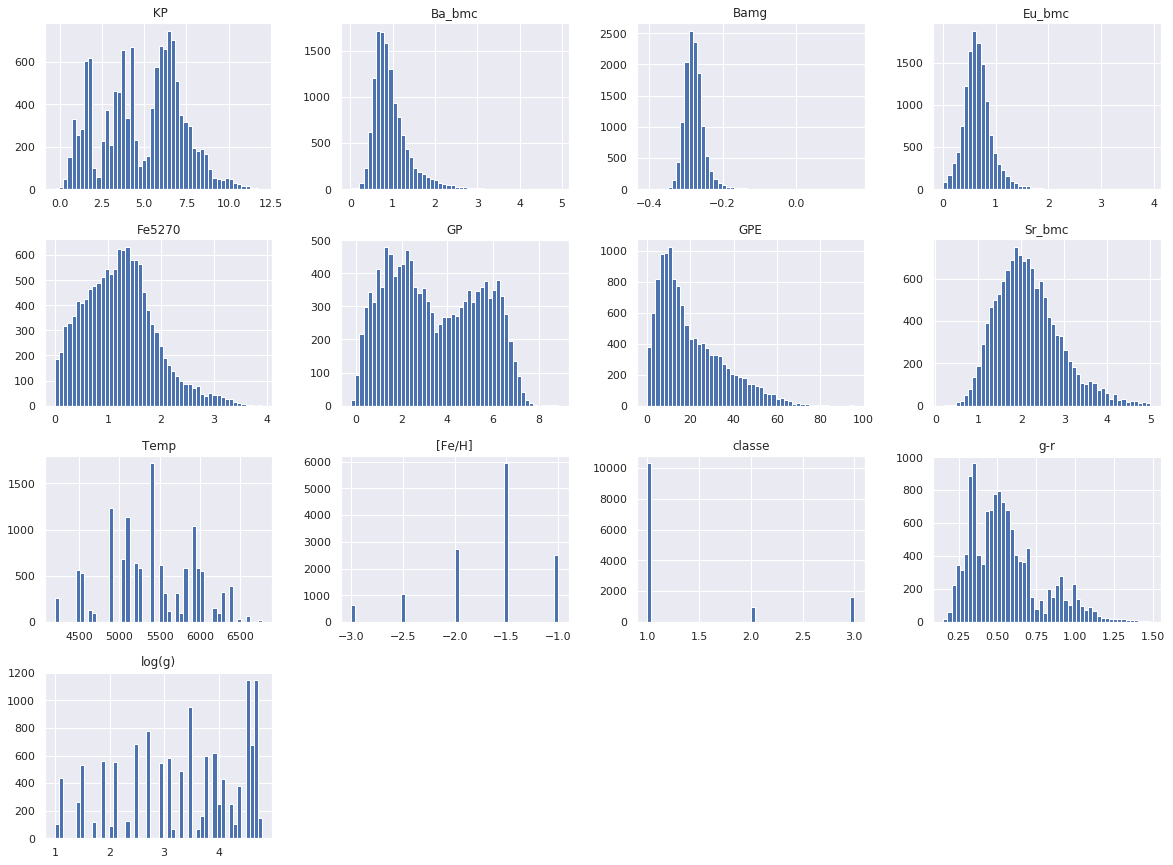

In [15]:
strat_train_set.hist(bins=50, figsize=(20,15))
plt.show()

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


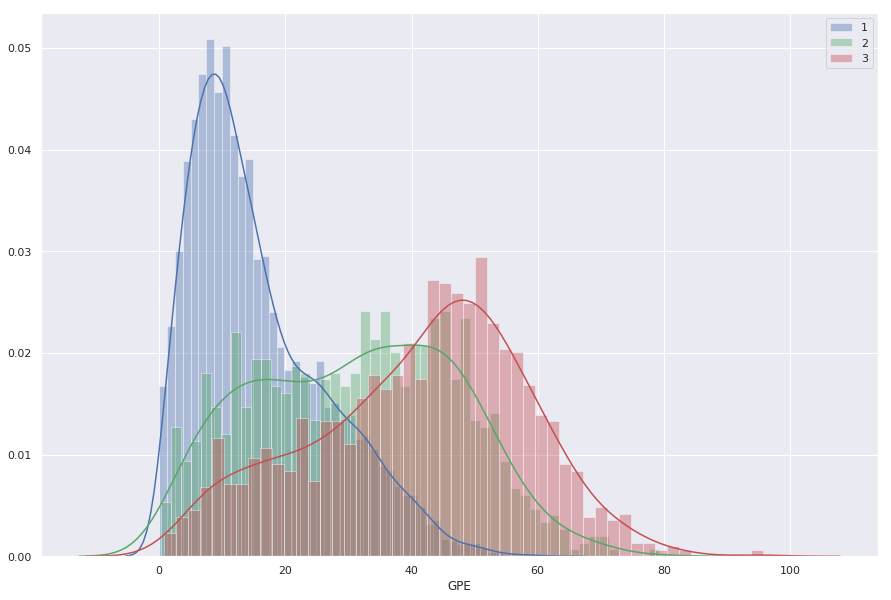

In [16]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(strat_train_set.GPE[strat_train_set.classe==1],bins=50, kde=True,label='1')
sns.distplot(strat_train_set.GPE[strat_train_set.classe==2],bins=50, kde=True,color='g',label='2')
sns.distplot(strat_train_set.GPE[strat_train_set.classe==3],bins=50, kde=True,color='r',label='3')
plt.legend()

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


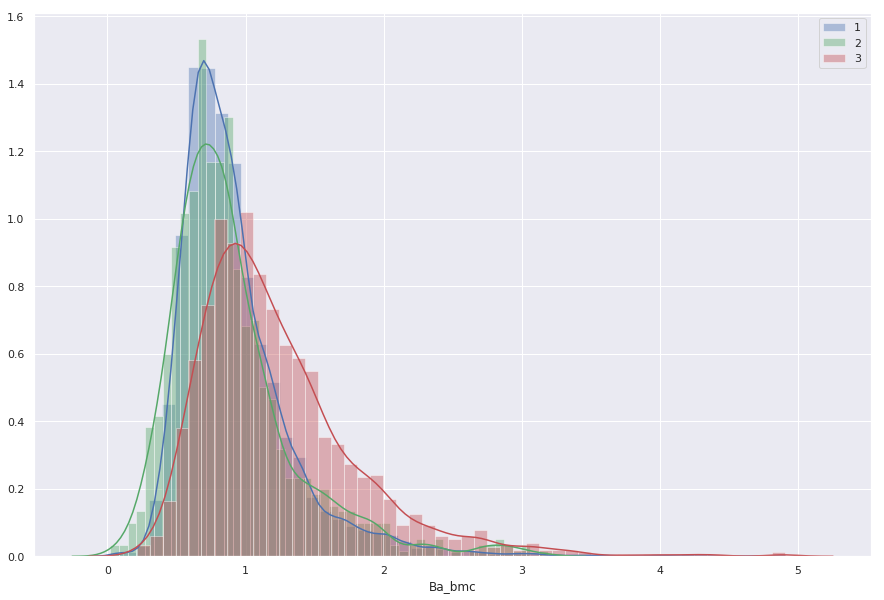

In [17]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(strat_train_set.Ba_bmc[strat_train_set.classe==1],bins=50, kde=True,label='1')
sns.distplot(strat_train_set.Ba_bmc[strat_train_set.classe==2],bins=50, kde=True,color='g',label='2')
sns.distplot(strat_train_set.Ba_bmc[strat_train_set.classe==3],bins=50, kde=True,color='r',label='3')

plt.legend()

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


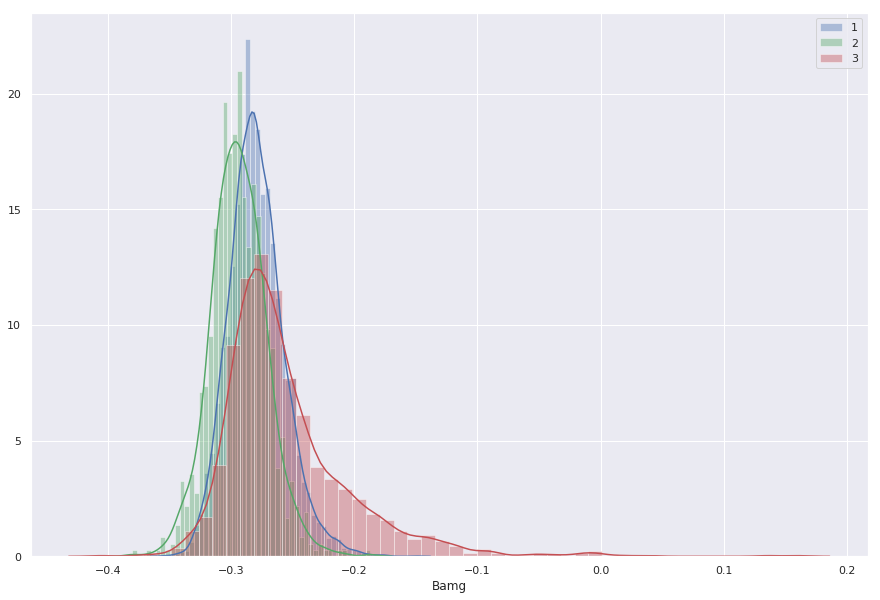

In [20]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(strat_train_set.Bamg[strat_train_set.classe==1],bins=50, kde=True,label='1')
sns.distplot(strat_train_set.Bamg[strat_train_set.classe==2],bins=50, kde=True,color='g',label='2')
sns.distplot(strat_train_set.Bamg[strat_train_set.classe==3],bins=50, kde=True,color='r',label='3')
plt.legend()

## 3.1 Feature Scaling

We have seen above that the features have quite different scales. We will scale the features to have a mean value equal to zero and a standard deviation equal to 1.

In [21]:
std_sc=StandardScaler()

In [22]:
strat_train_set.columns

Index(['ID', 'Temp', '[Fe/H]', 'log(g)', ' KP', 'Fe5270', 'GP', 'GPE', 'g-r',
       'Bamg', 'Ba_bmc', 'Eu_bmc', 'Sr_bmc', 'classe'],
      dtype='object')

In [23]:
strat_train_set[[' KP', 'Fe5270','GP','GPE','g-r',
          'Bamg','Ba_bmc','Eu_bmc','Sr_bmc']] = std_sc.fit_transform(strat_train_set[[' KP','Fe5270','GP','GPE','g-r',
                                                                                      'Bamg','Ba_bmc','Eu_bmc','Sr_bmc']])



In [24]:
strat_train_set.describe()

Temp        [Fe/H]        log(g)            KP        Fe5270  \
count  12870.000000  12870.000000  12870.000000  1.287000e+04  1.287000e+04   
mean    5393.006216     -1.664569      3.332098  1.351073e-16  1.083826e-16   
std      537.546752      0.518553      1.100943  1.000039e+00  1.000039e+00   
min     4200.000000     -3.000000      1.000000 -2.173033e+00 -1.829353e+00   
25%     5040.000000     -2.000000      2.500000 -7.443028e-01 -7.512520e-01   
50%     5400.000000     -1.500000      3.500000  1.891566e-01 -2.802604e-02   
75%     5900.000000     -1.500000      4.400000  7.445686e-01  5.945023e-01   
max     6775.000000     -1.000000      4.800000  3.004201e+00  4.025333e+00   

                 GP           GPE           g-r          Bamg        Ba_bmc  \
count  1.287000e+04  1.287000e+04  1.287000e+04  1.287000e+04  1.287000e+04   
mean   4.358941e-17 -4.601344e-17 -3.051517e-16  2.548855e-15 -2.015999e-16   
std    1.000039e+00  1.000039e+00  1.000039e+00  1.000039e+00  1.000039e+00   
min   -1.829892e+00 -1.326067e+00 -1.737792e+00 -4.355577e+00 -2.064650e+00   
25%   -8.674073e-01 -7.665386e-01 -8.093181e-01 -5.890337e-01 -6.409211e-01   
50%   -1.283005e-01 -3.075614e-01 -1.685404e-01 -1.139742e-01 -2.328877e-01   
75%    9.037856e-01  5.799540e-01  4.678782e-01  4.289510e-01  3.681938e-01   
max    2.713548e+00  4.981650e+00  4.077157e+00  1.485040e+01  8.664873e+00   

             Eu_bmc        Sr_bmc        classe  
count  1.287000e+04  1.287000e+04  12870.000000  
mean  -9.408860e-17 -1.099267e-16      1.326651  
std    1.000039e+00  1.000039e+00      0.687847  
min   -2.269160e+00 -2.636948e+00      1.000000  
25%   -5.904485e-01 -7.096935e-01      1.000000  
50%   -9.894932e-02 -1.112108e-01      1.000000  
75%    4.444688e-01  5.702366e-01      1.000000  
max    1.134398e+01  3.806192e+00      3.000000

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


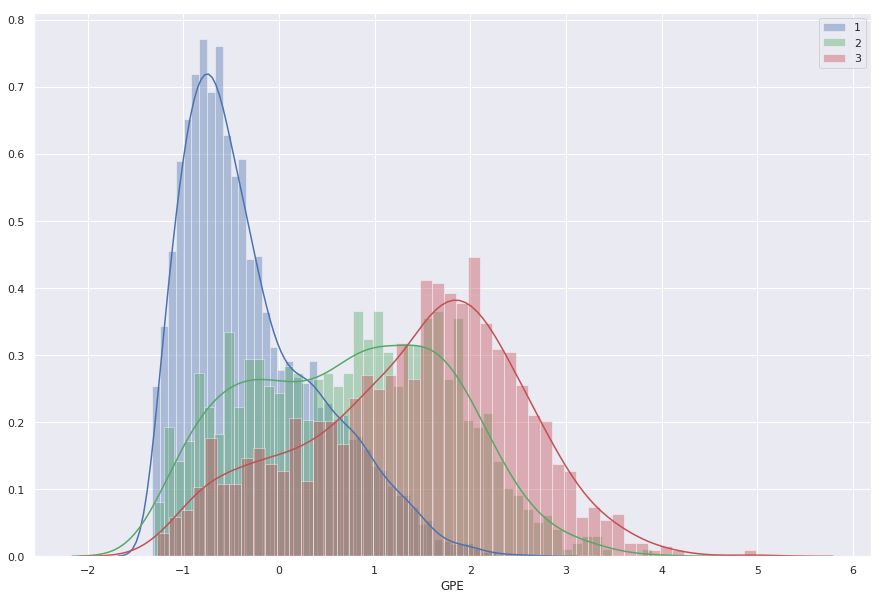

In [25]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(strat_train_set.GPE[strat_train_set.classe==1],bins=50, kde=True,label='1')
sns.distplot(strat_train_set.GPE[strat_train_set.classe==2],bins=50, kde=True,color='g',label='2')
sns.distplot(strat_train_set.GPE[strat_train_set.classe==3],bins=50, kde=True,color='r',label='3')
plt.legend()

In [26]:
# drop non feature columns
drop_elements = ['ID','Temp','[Fe/H]','log(g)']
train = strat_train_set.drop(drop_elements, axis = 1)
train.head(10)

KP    Fe5270        GP       GPE       g-r      Bamg    Ba_bmc  \
13669 -0.592050 -1.580791 -1.069553 -0.598827 -0.268798 -0.147907 -0.101264   
18119 -1.423058 -1.682611 -0.064981  0.149256 -1.240862 -0.317571  1.870897   
4509   1.283521  0.466103 -0.286600 -0.786738  0.428647  0.734346  0.344063   
14074 -1.686414 -1.507420 -1.630887 -0.915354 -1.428301 -1.030160  1.171098   
5671   0.660582  0.262462  0.646612  0.184081  0.123515 -0.113974 -0.430323   
6220   0.785507 -0.340975 -0.458468 -0.733643 -0.151104  0.496817 -0.480779   
12464 -0.856250 -0.993825 -1.318811 -1.039550 -0.918294 -0.046109  0.526142   
7941   0.167210  0.217541  0.767724  0.539259 -0.255721 -0.113974  0.030360   
6182   0.739504  0.075292 -0.531838 -0.456162 -0.155463  0.157488 -0.156107   
1341   1.501296  1.632549  0.177745  0.264153  0.210695  0.089623 -1.132316   

         Eu_bmc    Sr_bmc  classe  
13669 -0.766973  0.301605       1  
18119  1.226714 -1.041887       3  
4509   0.929045  1.590233       1  
14074 -1.988798  1.291828       1  
5671   0.036040  1.291828       1  
6220  -0.645829 -0.137305       1  
12464 -0.368928 -1.119499       1  
7941   0.029117 -0.842504       1  
6182   0.184874  0.815451       1  
1341   0.312941 -1.124851       1

In [27]:
# setting feature matrix and target vector
drop_elem=['classe']
X_train= train.drop(drop_elem, axis = 1)
y_train=train.loc[:,'classe']

In [28]:
X_train.columns

Index([' KP', 'Fe5270', 'GP', 'GPE', 'g-r', 'Bamg', 'Ba_bmc', 'Eu_bmc',
       'Sr_bmc'],
      dtype='object')

# 4. Pre-processing Test Set

In [29]:
strat_test_set[[' KP', 'Fe5270','GP','GPE','g-r',
          'Bamg','Ba_bmc','Eu_bmc','Sr_bmc']] = std_sc.fit_transform(strat_test_set[[' KP','Fe5270','GP','GPE','g-r',
                                                                                      'Bamg','Ba_bmc','Eu_bmc','Sr_bmc']])

In [31]:
drop_elements = ['ID','Temp','[Fe/H]','log(g)']
test = strat_test_set.drop(drop_elements, axis = 1)
test.head(10)

KP    Fe5270        GP       GPE       g-r      Bamg    Ba_bmc  \
13133 -1.377601 -1.354952 -1.437932 -0.750110 -1.359791 -0.869902  2.366824   
7822   0.432609 -0.331289 -0.109974 -0.294608 -0.313227 -0.938931  0.086863   
1083   1.056790  0.854885  1.507730  0.724081  0.332526 -0.352188 -0.868488   
18019 -0.967558 -1.046638  0.389502  0.446494 -0.789747 -0.421217 -0.649509   
8599   0.009845 -0.909947 -1.036364 -0.963475 -0.754120 -0.076074 -1.035943   
190    1.435455  2.931069  1.764674  0.286003  2.630514  0.717754 -0.336068   
12231 -1.012930 -0.759587 -1.286847 -1.210086 -0.927805 -0.593788  3.107490   
5305   0.639539 -0.097395  0.872079  0.622205  0.198922  0.061983 -0.960803   
3419   1.413829  0.654405  0.353221  0.089529  1.396904  1.339011 -1.033796   
12175 -0.901409 -1.007149 -1.324121 -0.729481 -0.945619 -0.731845  0.653633   

         Eu_bmc    Sr_bmc  classe  
13133  3.427104  2.943313       1  
7822   0.509367 -0.595715       1  
1083  -0.115130 -1.359140       1  
18019 -0.838593 -1.098425       3  
8599  -0.719153  0.142307       1  
190    1.700350  1.211904       1  
12231  4.447458  0.547417       1  
5305  -0.237983 -0.651869       1  
3419  -0.548525 -0.764176       1  
12175  1.382982  0.726574       1

In [32]:
# setting feature matrix and target vector
drop_elem=['classe']
X_test= test.drop(drop_elem, axis = 1)
y_test=test.loc[:,'classe']

# 5. Modelling

Because our dataset is extremely imbalanced, we need to balance the data before applying the models. Otherwise, the performace of the models in the minority classes will be poor. We will use two ways to increase the minority classes: Random Oversampling and Synthetic Minority Oversampling Technique (SMOTE).

We will test two models:

Logistic regression and Random Forest



## 5.1 Re-sampling

In [33]:
# Re-sampling:
ros = RandomOverSampler(random_state=42)
smt=SMOTE(random_state=42,k_neighbors=15)

In [34]:
# New training set
X_res1, y_res1 = ros.fit_sample(X_train, y_train)
X_res2, y_res2 = smt.fit_sample(X_train, y_train)

In [35]:
# Proportion of class 0 and class 1 in the training set
pd.value_counts(y_res1,dropna=True,sort=False,normalize=True)

1    0.333333
2    0.333333
3    0.333333
dtype: float64

In [36]:
# we can see that the trainig set is now larger
len(y_res1)

30885

## 5.2 Logistic Regression 

In [37]:
# Logistic Regression
clf_log1 = LogisticRegression(random_state=42)
clf_log1 = clf_log1.fit(X_res1,y_res1) # fit logistic regression to the trainig set
score_log1 = cross_val_score(clf_log1, X_res1, y_res1, cv=5).mean()
print('Accuracy:',score_log1)

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

Accuracy: 0.7783713776914359


In [38]:
# Logistic Regression
clf_log2 = LogisticRegression(random_state=42)
clf_log2 = clf_log2.fit(X_res2,y_res2) # fit logistic regression to the trainig set
score_log2 = cross_val_score(clf_log2, X_res2, y_res2, cv=5).mean()
print('Accuracy:',score_log2)

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

Accuracy: 0.8002266472397604


In [39]:
#From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Model Evaluation:**

In [40]:
# Predictions using logistic regression
y_pred_log1 = clf_log1.predict(X_test) 
y_pred_log2 = clf_log2.predict(X_test) 

In [41]:
accuracy_score(y_test, y_pred_log1)

0.9026468455402465

In [42]:
accuracy_score(y_test, y_pred_log2)

0.902102973168963

In [43]:
# Getting confusion matrix for logistic regression
conf_log1=confusion_matrix(y_test, y_pred_log1)
conf_log2=confusion_matrix(y_test, y_pred_log2)

Normalized confusion matrix
[[0.95 0.03 0.02]
 [0.1  0.71 0.19]
 [0.05 0.23 0.72]]


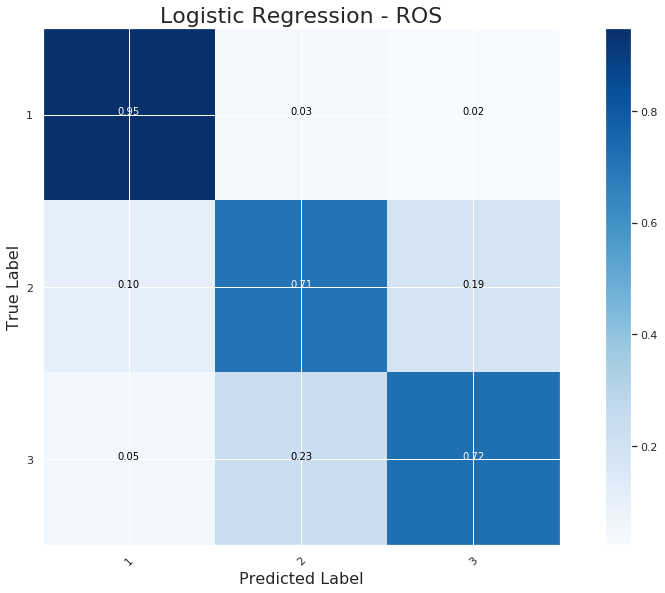

In [44]:
class_names=[1,2,3]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(13,8))
plot_confusion_matrix(conf_log1, classes=class_names, normalize=True)
ax.set_title('Logistic Regression - ROS',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
savefig('conf_matrix_log1.eps', fmt='eps', dpi=200)
savefig('conf_matrix_log1.jpeg', fmt='jpeg', dpi=200)
plt.show()

Normalized confusion matrix
[[0.95 0.03 0.02]
 [0.1  0.7  0.19]
 [0.05 0.23 0.72]]


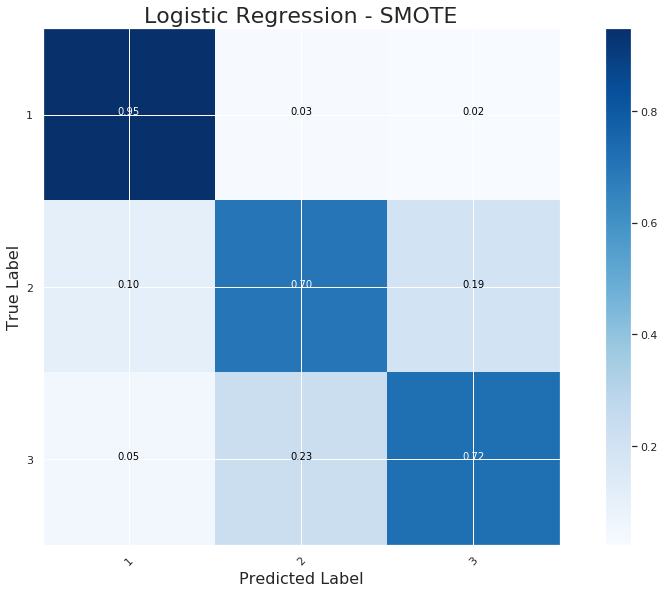

In [45]:
class_names=[1,2,3]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(13,8))
plot_confusion_matrix(conf_log2, classes=class_names, normalize=True)
ax.set_title('Logistic Regression - SMOTE',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
savefig('conf_matrix_log2.eps', fmt='eps', dpi=200)
savefig('conf_matrix_log2.jpeg', fmt='jpeg', dpi=200)
plt.show()

## 5.3 Random Forest

In [46]:
clf_rf1 = RandomForestClassifier(
    max_depth=None, random_state=42
    )
clf_rf1 = clf_rf1.fit(X_res1,y_res1)
score_rf1 = cross_val_score(clf_rf1, X_res1, y_res1, cv=5).mean()
print(score_rf1)

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9952727861421401


In [47]:
clf_rf2 = RandomForestClassifier(
    max_depth=None, \
    random_state=42)
clf_rf2 = clf_rf2.fit(X_res2,y_res2)
score_rf2 = cross_val_score(clf_rf2, X_res2, y_res2, cv=5).mean()
print(score_rf2)

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9454751497490692


In [39]:

pd.DataFrame(list(zip(X_train.columns, np.transpose(clf_log1.coef_))))

0                                                  1
0      KP  [4.2607802256058775, -0.8863206912402601, -1.9...
1  Fe5270  [-0.19097821979769836, -0.1603523460193922, 0....
2      GP  [-2.7073335416888, 1.4870612804644678, 0.29749...
3     GPE  [-0.41944968513424097, -0.8662445494980555, 0....
4     g-r  [0.016668677371686612, 0.11232185362984372, -0...
5    Bamg  [-0.6861272189438272, -0.9113840556497758, 1.4...
6  Ba_bmc  [-0.15310935946737933, -0.10859628231388267, 0...
7  Eu_bmc  [0.006494585594072822, -0.011064943485182869, ...
8  Sr_bmc  [0.12619126328678448, -0.03550932620087836, -0...

**Model Evaluation:**

In [48]:
# Predictions using lRandom Forest
y_pred_rf1 = clf_rf1.predict(X_test) 
y_pred_rf2 = clf_rf2.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred_rf1)

0.9309282088469906

In [50]:
accuracy_score(y_test, y_pred_rf2)

0.9193255982596084

In [51]:
# Getting confusion matrix for lRandom Forest
conf_rf1=confusion_matrix(y_test, y_pred_rf1)
conf_rf2=confusion_matrix(y_test, y_pred_rf2)

Normalized confusion matrix
[[0.99 0.01 0.01]
 [0.18 0.6  0.22]
 [0.09 0.14 0.77]]


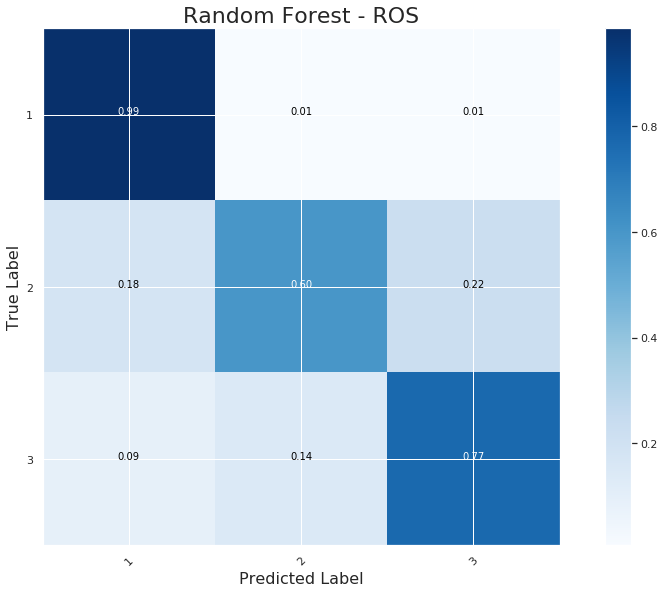

In [52]:
class_names=[1,2,3]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(13,8))
plot_confusion_matrix(conf_rf1, classes=class_names, normalize=True)
ax.set_title('Random Forest - ROS',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
savefig('conf_matrix_rf1.eps', fmt='eps', dpi=200)
savefig('conf_matrix_rf1.jpeg', fmt='jpeg', dpi=200)
plt.show()

Normalized confusion matrix
[[0.97 0.02 0.01]
 [0.12 0.68 0.2 ]
 [0.05 0.21 0.74]]


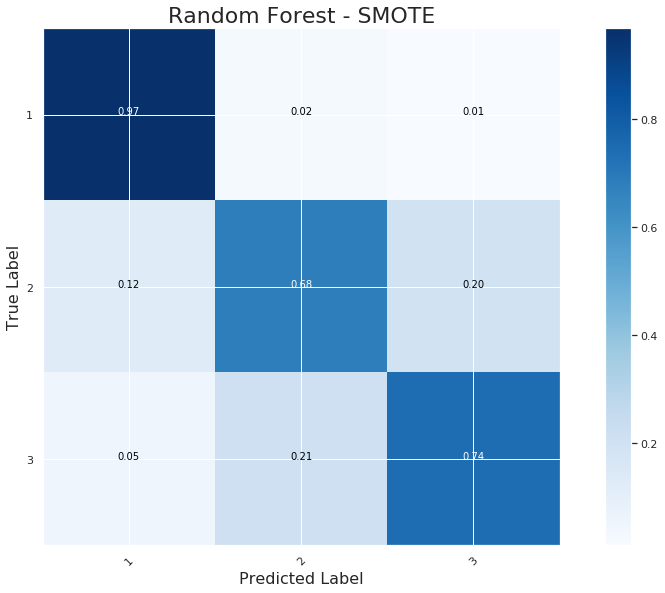

In [53]:
class_names=[1,2,3]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(13,8))
plot_confusion_matrix(conf_rf2, classes=class_names, normalize=True)
ax.set_title('Random Forest - SMOTE',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
savefig('conf_matrix_rf2.eps', fmt='eps', dpi=200)
savefig('conf_matrix_rf2.jpeg', fmt='jpeg', dpi=200)
plt.show()

## 5.4 Grid Search:

In [54]:
C_vals = [0.001,0.05,0.01,0.1,1,10]
penalty_vals=['l1','l2']

clf_logr = LogisticRegression(random_state=42)

param_grid = [{'C':C_vals, 'penalty':penalty_vals}]
grid_search_lr = GridSearchCV(clf_logr, param_grid, cv=5,scoring='accuracy')
grid_search_lr.fit(X_res1, np.ravel(y_res1))



/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/monique/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.05, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
grid_search_lr.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [56]:
# Shows mean error for each parameter combination
cvres = grid_search_lr.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.8660861556886839 {'C': 0.001, 'penalty': 'l1'}
0.8725668081639398 {'C': 0.001, 'penalty': 'l2'}
0.8825287815975553 {'C': 0.05, 'penalty': 'l1'}
0.8825104374289047 {'C': 0.05, 'penalty': 'l2'}
0.8831522566181659 {'C': 0.01, 'penalty': 'l1'}
0.8808027598162113 {'C': 0.01, 'penalty': 'l2'}
0.8822719285280161 {'C': 0.1, 'penalty': 'l1'}
0.8828038983855332 {'C': 0.1, 'penalty': 'l2'}
0.882216878855318 {'C': 1, 'penalty': 'l1'}
0.8822535790187739 {'C': 1, 'penalty': 'l2'}
0.8823086264016474 {'C': 10, 'penalty': 'l1'}
0.8823086264016474 {'C': 10, 'penalty': 'l2'}


In [57]:
final_model1 = grid_search_lr.best_estimator_  
y_pred_gs = final_model1.predict(X_test)

In [58]:
conf_gs=confusion_matrix(y_test, y_pred_gs)

In [59]:
accuracy_score(y_test, y_pred_gs)

0.9017403915881074

Normalized confusion matrix
[[0.95 0.03 0.02]
 [0.1  0.72 0.18]
 [0.05 0.24 0.71]]


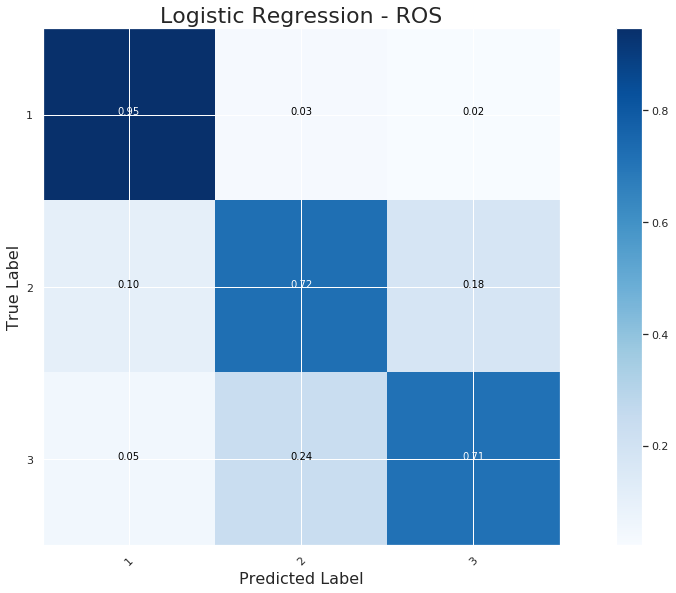

In [60]:
class_names=[1,2,3]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf_gs, classes=class_names, normalize=True)
ax.set_title('Logistic Regression - ROS',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
#savefig('conf_matrix_log.eps', fmt='eps', dpi=200)
savefig('conf_matrix_log_gs.eps', fmt='eps', dpi=200)
savefig('conf_matrix_log_gs.jpeg', fmt='jpeg', dpi=200)
plt.show()

In [61]:
n_vals = [200,400,600]
penalty_vals=['gini','entropy']
min_samples_vals=[2,5,10]
clf_rfg = RandomForestClassifier(random_state=42)


param_grid = [{'n_estimators':n_vals, 'criterion':penalty_vals, 'min_samples_split': min_samples_vals}]


grid_search_rf = GridSearchCV(clf_rfg, param_grid, cv=5,scoring='accuracy')

grid_search_rf.fit(X_res1, np.ravel(y_res1))


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [200, 400, 600], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
grid_search_rf.best_params_

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 400}

In [63]:
# Shows mean error for each parameter combination
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9980716391742995 {'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 200}
0.9981689566334574 {'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 400}
0.9981527377158349 {'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 600}
0.9980067555961927 {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 200}
0.997990534042548 {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 400}
0.9980554186752179 {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 600}
0.9975524523836313 {'criterion': 'gini', 'min_samples_split': 10, 'n_estimators': 200}
0.9975849094742835 {'criterion': 'gini', 'min_samples_split': 10, 'n_estimators': 400}
0.9975686810609612 {'criterion': 'gini', 'min_samples_split': 10, 'n_estimators': 600}
0.9983959938152024 {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}
0.9984122087812 {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 400}
0.9984284234838585 {'criterion': 'entropy', 'min_

In [64]:
final_model = grid_search_rf.best_estimator_  
y_pred_gsr = final_model.predict(X_test)

In [65]:
conf_gsr=confusion_matrix(y_test, y_pred_gsr)

In [66]:
accuracy_score(y_test, y_pred_gsr)

0.9403553299492385

Normalized confusion matrix
[[0.99 0.   0.01]
 [0.16 0.62 0.22]
 [0.08 0.12 0.8 ]]


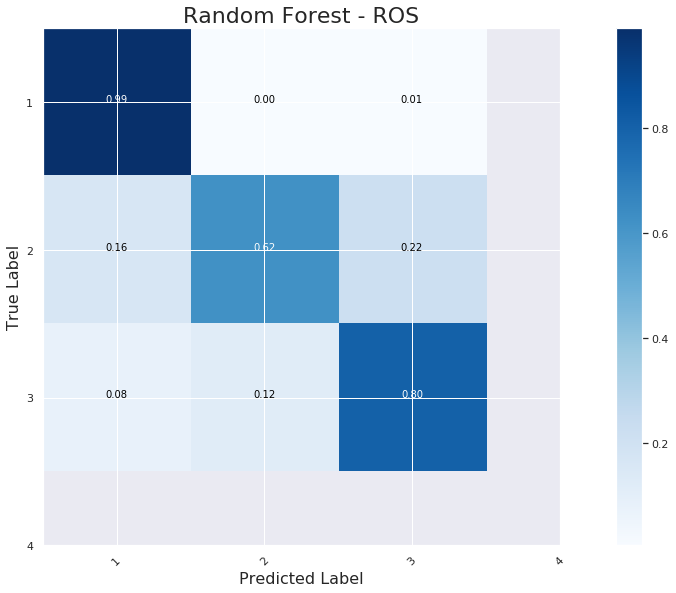

In [67]:
class_names=[1,2,3,4]
np.set_printoptions(precision=2)

f,ax=plt.subplots(figsize=(16,8))
plot_confusion_matrix(conf_gsr, classes=class_names, normalize=True)
ax.set_title('Random Forest - ROS',fontsize=22)
ax.set_xlabel('Predicted Label',fontsize=16)
ax.set_ylabel('True Label',fontsize=16)
savefig('conf_matrix_rf_gs.eps', fmt='eps', dpi=200)
savefig('conf_matrix_rf_gs.jpeg', fmt='jpeg', dpi=200)
#savefig('conf_matrix_log.eps', fmt='eps', dpi=200)
plt.show()

# 6. Applying to Observed Stars

In this section we will apply the best model got from grid search for the logistic regression using Random Oversampling.

In [68]:
# Getting the data into a dataframe
dfo = pd.read_csv('Hugo_obs.csv')
dfo.head(10)

ID  temp  [Fe/H]  log(g)     KP  Fe5270     GP  \
0  spec-0266-51630-0056.fits2.txt  6267  -2.056   3.953  3.228   0.232  0.818   
1  spec-0273-51957-0147.fits2.txt  6043  -1.503   4.205  5.875   1.161  1.927   
2  spec-0280-51612-0258.fits2.txt  6117  -1.246   4.057  6.278   1.042  2.230   
3  spec-0280-51612-0280.fits2.txt  6053  -1.149   3.998  7.076   1.040  2.886   
4  spec-0281-51614-0317.fits2.txt  6234  -1.338   3.740  6.068   0.897  1.378   
5  spec-0282-51630-0271.fits2.txt  6420  -1.969   3.492  1.807   0.591  0.698   
6  spec-0282-51658-0214.fits2.txt  6244  -1.207   3.579  6.314   1.419  1.913   
7  spec-0282-51658-0483.fits2.txt  6025  -1.040   3.858  7.303   1.338  2.978   
8  spec-0283-51584-0443.fits2.txt  6297  -1.463   2.328  3.914   1.250  1.363   
9  spec-0284-51943-0510.fits2.txt  5900  -2.160   4.324  4.353   0.533  1.335   

      GPE    g-r   Bamg  Ba_bmc  Eu_bmc  Sr_bmc    CN1    CN2        Dz  \
0   7.125  0.313 -0.370   1.260   1.919   2.581 -0.248 -0.214     1.290   
1  19.030  0.339 -0.395   0.748   0.471   1.841 -0.221 -0.569     1.098   
2  14.491  0.316 -0.542   0.786   0.359   1.649 -0.228 -0.259     2.157   
3   5.318  0.341  0.043   0.582   0.538   1.376 -0.299 -2.573     2.452   
4   2.803  0.296 -0.124   0.543   0.282   1.404 -0.226  1.765 -9999.000   
5   1.123  0.235 -0.359   1.471   0.277   2.943 -0.248  0.818     5.461   
6   7.329  0.243  0.031   0.910   0.928   2.632 -0.252  0.063     6.248   
7  17.071  0.306  0.019   1.074   0.791   2.504 -0.205 -1.371     3.822   
8   7.010  0.132  0.069   3.221   0.679   3.153 -0.225 -1.730    13.431   
9  10.879  0.326 -0.553   0.369   0.832   1.795 -0.191 -2.025     1.334   

         l       b     Vr  
0  237.133  37.418  299.3  
1  246.990  47.117   31.2  
2  260.968  54.720  113.8  
3  259.662  54.776  246.4  
4  261.108  55.302  399.2  
5  264.933  56.576   62.6  
6  265.804  56.147  331.9  
7  265.525  57.580  263.8  
8  267.696  59.308  184.8  
9  273.572  60.018   48.9

In [69]:
dfo[[' KP', 'Fe5270','GP','GPE','g-r',
          'Bamg','Ba_bmc','Eu_bmc','Sr_bmc']] = std_sc.fit_transform(dfo[[' KP','Fe5270','GP','GPE','g-r',
                                                                      'Bamg','Ba_bmc','Eu_bmc','Sr_bmc']])
                                                                  

In [70]:
dfo.describe()

temp        [Fe/H]        log(g)            KP        Fe5270  \
count  17036.000000  17036.000000  17036.000000  1.703600e+04  1.703600e+04   
mean    5556.779584     -1.504155      3.442723  1.042252e-15 -3.295608e-16   
std      525.957407      0.370186      0.918218  1.000029e+00  1.000029e+00   
min     4015.000000     -4.282000      1.001000 -4.557218e+00 -1.959948e+00   
25%     5160.000000     -1.701000      2.665750 -6.624004e-01 -6.931044e-01   
50%     5435.000000     -1.419500      3.730500  2.056599e-01 -1.308868e-01   
75%     6081.000000     -1.230750      4.219000  8.446419e-01  5.322036e-01   
max     6512.000000     -1.000000      4.898000  2.049983e+00  5.426018e+00   

                 GP           GPE           g-r          Bamg        Ba_bmc  \
count  1.703600e+04  1.703600e+04  1.703600e+04  1.703600e+04  1.703600e+04   
mean  -1.404514e-15 -1.298849e-15  1.134590e-15  1.430057e-17 -7.099536e-17   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -2.400189e+00 -1.761120e+00 -2.858177e+00 -2.656180e+00 -2.223234e+00   
25%   -9.377641e-01 -7.784559e-01 -8.860526e-01 -2.704200e-01 -6.402413e-01   
50%    1.577804e-01 -1.083274e-01  5.738469e-02  5.747595e-01 -2.073721e-01   
75%    9.068270e-01  5.889157e-01  6.314037e-01  6.924427e-01  3.815313e-01   
max    2.461608e+00  6.444944e+00  4.655221e+00  1.730195e+00  8.487762e+00   

             Eu_bmc        Sr_bmc           CN1        CN2            Dz  \
count  1.703600e+04  1.703600e+04  17036.000000  55.000000  17036.000000   
mean  -8.559979e-17 -5.128102e-16     -0.217109  -0.427691  -4324.152203   
std    1.000029e+00  1.000029e+00      0.148711   1.122344   4957.177404   
min   -2.449006e+00 -2.690338e+00     -9.990000  -3.017000  -9999.000000   
25%   -6.059597e-01 -6.466864e-01     -0.252000  -1.008000  -9999.000000   
50%   -1.875571e-01 -2.190408e-01     -0.226000  -0.299000     -3.491000   
75%    3.795340e-01  3.703424e-01     -0.198000   0.318500      3.535250   
max    6.887250e+00  4.982609e+00      1.641000   1.765000    148.802000   

                  l             b            Vr  
count  17036.000000  17036.000000  17036.000000  
mean     151.898993     51.877479    -43.961816  
std       88.525071     15.586280    141.089011  
min        0.134000     -7.015000   -718.000000  
25%       72.511750     39.658250   -136.900000  
50%      150.455000     51.471000    -45.100000  
75%      214.147000     63.239500     41.300000  
max      359.993000     89.817000    928.800000

In [71]:
drop_elements = ['ID','temp','[Fe/H]','log(g)','CN1','CN2','Dz','l','b','Vr']
X_new = dfo.drop(drop_elements, axis = 1)
X_new.describe()

KP        Fe5270            GP           GPE           g-r  \
count  1.703600e+04  1.703600e+04  1.703600e+04  1.703600e+04  1.703600e+04   
mean   1.042252e-15 -3.295608e-16 -1.404514e-15 -1.298849e-15  1.134590e-15   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -4.557218e+00 -1.959948e+00 -2.400189e+00 -1.761120e+00 -2.858177e+00   
25%   -6.624004e-01 -6.931044e-01 -9.377641e-01 -7.784559e-01 -8.860526e-01   
50%    2.056599e-01 -1.308868e-01  1.577804e-01 -1.083274e-01  5.738469e-02   
75%    8.446419e-01  5.322036e-01  9.068270e-01  5.889157e-01  6.314037e-01   
max    2.049983e+00  5.426018e+00  2.461608e+00  6.444944e+00  4.655221e+00   

               Bamg        Ba_bmc        Eu_bmc        Sr_bmc  
count  1.703600e+04  1.703600e+04  1.703600e+04  1.703600e+04  
mean   1.430057e-17 -7.099536e-17 -8.559979e-17 -5.128102e-16  
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  
min   -2.656180e+00 -2.223234e+00 -2.449006e+00 -2.690338e+00  
25%   -2.704200e-01 -6.402413e-01 -6.059597e-01 -6.466864e-01  
50%    5.747595e-01 -2.073721e-01 -1.875571e-01 -2.190408e-01  
75%    6.924427e-01  3.815313e-01  3.795340e-01  3.703424e-01  
max    1.730195e+00  8.487762e+00  6.887250e+00  4.982609e+00

In [72]:
y_pred_new = final_model1.predict(X_new)

In [73]:
yy=pd.Series(y_pred_new)
pd.value_counts(yy,dropna=True,sort=False,normalize=True)

1    0.831592
2    0.033517
3    0.134891
dtype: float64

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


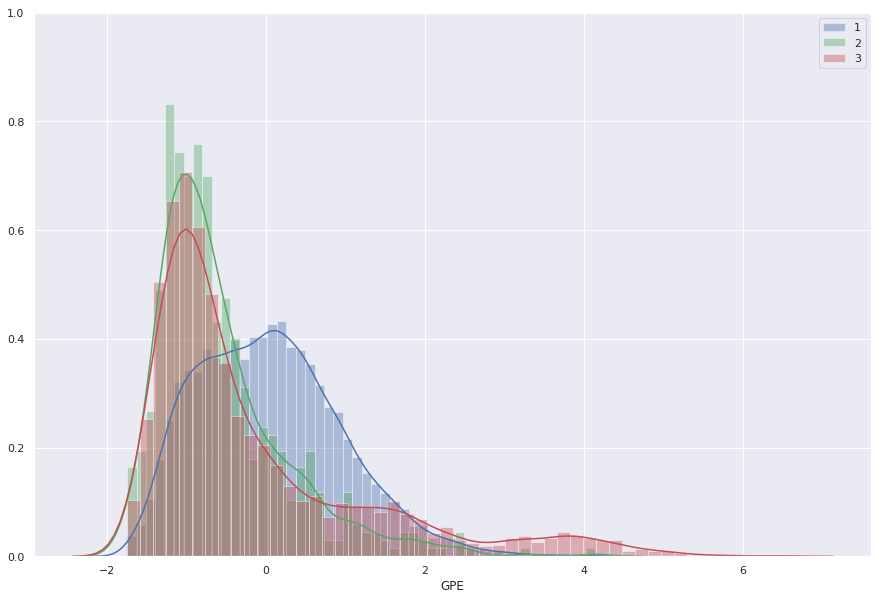

In [74]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(X_new.GPE[yy==1],bins=50, kde=True,label='1')
sns.distplot(X_new.GPE[yy==2],bins=50, kde=True,color='g',label='2')
sns.distplot(X_new.GPE[yy==3],bins=50, kde=True,color='r',label='3')
ylim(0,1)
plt.legend()
plt.show()

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


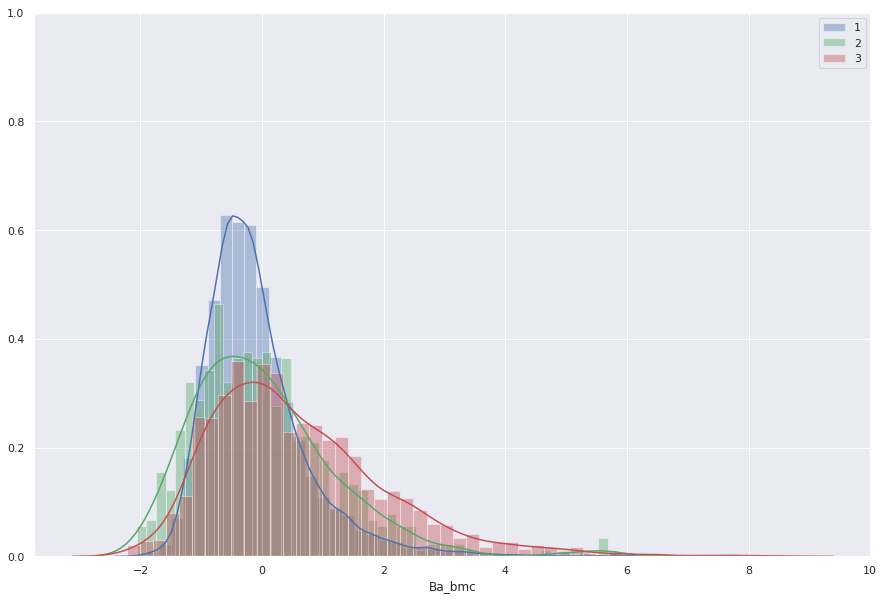

In [75]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(X_new.Ba_bmc[yy==1],bins=50, kde=True,label='1')
sns.distplot(X_new.Ba_bmc[yy==2],bins=50, kde=True,color='g',label='2')
sns.distplot(X_new.Ba_bmc[yy==3],bins=50, kde=True,color='r',label='3')
ylim(0,1)

plt.legend()
plt.show()

/home/monique/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


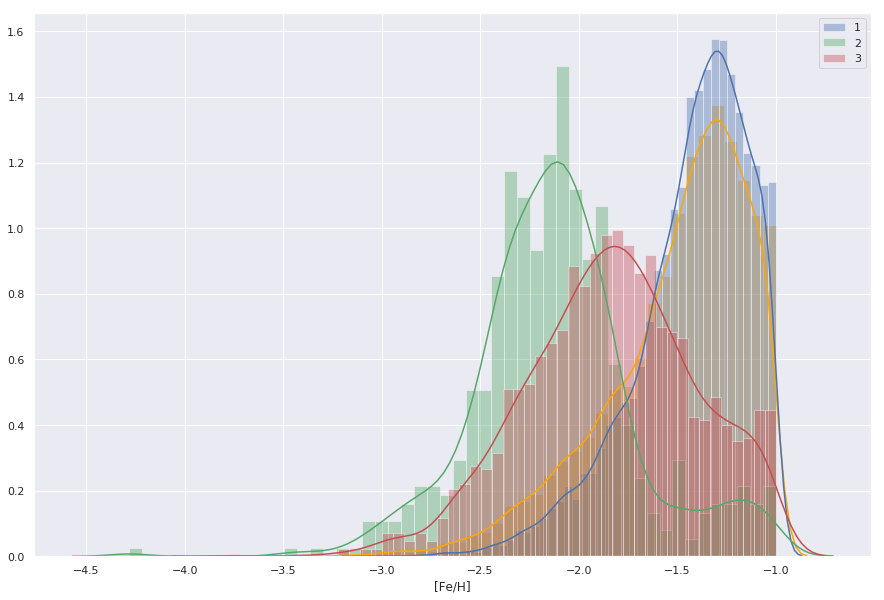

In [76]:
f,axes=plt.subplots(figsize=(15, 10))
sns.distplot(dfo['[Fe/H]'],bins=50, kde=True,color='orange')
sns.distplot(dfo['[Fe/H]'][yy==1],bins=50, kde=True,label='1')
sns.distplot(dfo['[Fe/H]'][yy==2],bins=50, kde=True,color='g',label='2')
sns.distplot(dfo['[Fe/H]'][yy==3],bins=50, kde=True,color='r',label='3')

plt.legend()
savefig('SDSS_lr1.eps', fmt='eps', dpi=200)
savefig('SDSS_lr1.jpeg', fmt='jpeg', dpi=200)
plt.show()

The Figure above shows the distribution of **[Fe/H]** for each class in our observed sample. Class 1 appears to be predominant at higher values of **[Fe/H]** and Class 2 is predominant at the lowest end of **[Fe/H]**. This result is quite encoreging, since it is quite similar to what we observe in nature. 

# 7. Conclusions

In this project we use synthetic data and machine learning models to find ways to select Carbon stars from the SDSS database. This database possesses spectra for hundreds of thousands of stars that can be potential targets for observations in high resolution in large telescopes. 

We used 9 features related to key chemical elements and a synthetic sample of approximately 20,000 objects. 

Before applying the models, we resampled our dataset to balance the data, using two types of oversampling.

We applied logistic regression and random forest. We get similar results with both techniques, however, random forest tends to increase the performance on carbon normal stars which is not what we want. 

Overall, the models increase our chance to correctly find Carbon rich stars from 7% and 13% to around 70%, which is a significant improvement. 

Finally, we applied the best logistic regression model to a set of observed stars from the SDSS database. We see that the distribution of metallicities ([Fe/H]) for each class resembles what we know from high-resolution studies which is an indication that the model performace on an unknown sample is doing fine. 